In [1]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('../code/')

from mnist_helpers import mnist_training, mnist_testing
from k_means import KMeans
from pca import Pca, make_image

In [4]:
! ls -l ./data/PCA_training_data.pickle

-rw-r--r--  1 janet  staff  386247310 Nov 21 07:51 ./data/PCA_training_data.pickle


In [5]:
import pickle
pca_training = pickle.load(file=open('./data/PCA_training_data.pickle', "rb"))

In [6]:
X_train_untransformed, y_train = mnist_training(shuffled=False) 
X_train = np.load('../notebooks/data/X_transformed_by_50_components.npy')
print("X_train shape: {}.  y_train shape: {}".format(X_train.shape, y_train.shape))

X_test_untransformed, y_test = mnist_testing(shuffled=False)
X_test = np.load('../notebooks/data/X_test_transformed_by_50_components.npy')
print("X_test shape: {}.  y_test shape: {}".format(X_test.shape, y_test.shape))



X_train shape: (60000, 50).  y_train shape: (60000,)
X_test shape: (10000, 50).  y_test shape: (10000,)


In [7]:
N_points = 60000
assert X_train_untransformed.shape[0] == N_points
assert X_train.shape[0] == N_points

## Q 5.1: 

k = 16, MNIST data transformed by first 50 PCA components.

In [8]:
km_16 = KMeans(k=16, train_X=X_train, train_y=y_train, 
            pca_obj=pca_training,
            max_iter = 500, 
            test_X=X_test, test_y=y_test,
            verbose=False)
km_16.run()

......................................................................................................................................................
Both the centers and assignments converged after 150 iterations.


(a) The squared reconstruction error vs iteration number.

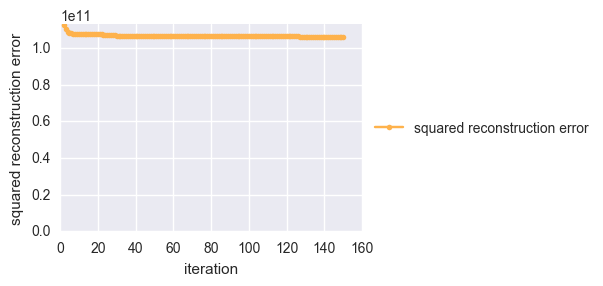

In [9]:
km_16_reconstruction_error = km_16.plot_squared_reconstruction_error()
km_16_reconstruction_error.savefig('../figures/k_means/k16_reconstruction_error.pdf',
                                  bbox_inches='tight')

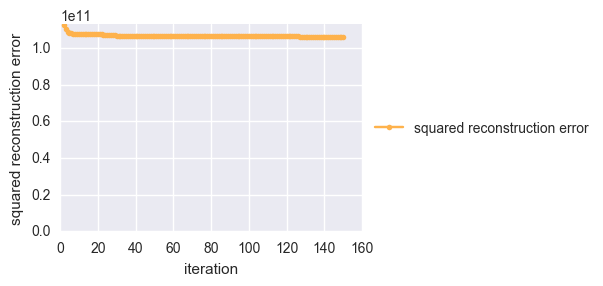

In [10]:
km_16_reconstruction_error = km_16.plot_squared_reconstruction_error()
km_16_reconstruction_error.savefig('../figures/k_means/k16_reconstruction_error.pdf',
                                  bbox_inches='tight')

In [11]:
km_16.results_df.tail(2)

,iteration,0/1 loss,(0/1 loss)/N,(squared reconstruction error)/N,squared reconstruction error
0,149.0,19230.0,0.3205,1.770762e+06,1.062457e+11
0,150.0,19230.0,0.3205,1.770762e+06,1.062457e+11


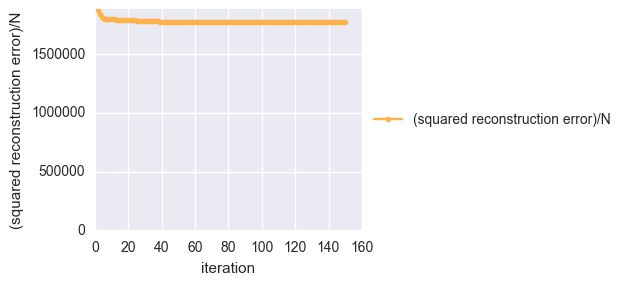

In [12]:
km_16_reconstruction_error_nromalized = \
    km_16.plot_squared_reconstruction_error_normalized()

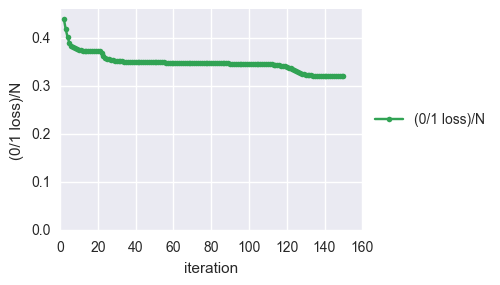

In [13]:
km_16_0_1_loss = km_16.plot_0_1_loss()
km_16_0_1_loss.savefig('../figures/k_means/k16_loss_01.pdf',
                       bbox_inches='tight')

(b) Let us say that the number of assignments for a mean is the number of points assigned to that
mean. Plot the number of assignments for each center in descending order.

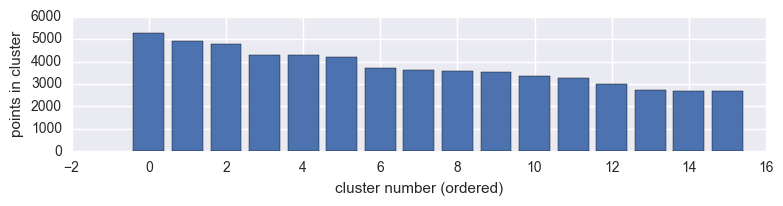

In [14]:
km_16_assignment_bars = km_16.plot_num_assignments_for_each_center()
km_16_assignment_bars.savefig('../figures/k_means/k16_assignment_bars.pdf',
                             bbox_inches='tight')

(c) Visualize the 16 centers that you learned, and display them in an order in that corresponds to
the frequency in which they were assigned (if you use a grid, just describe the ordering).

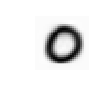

In [15]:
km_16.visualize_center(km_16.center_coordinates[0])

In [16]:
km_16.visualize_n_centers(16, top=True)

saving to k_16_top_16_centers_0.pdf
saving to k_16_top_16_centers_1.pdf
saving to k_16_top_16_centers_2.pdf
saving to k_16_top_16_centers_3.pdf
saving to k_16_top_16_centers_4.pdf
saving to k_16_top_16_centers_5.pdf
saving to k_16_top_16_centers_6.pdf
saving to k_16_top_16_centers_7.pdf
saving to k_16_top_16_centers_8.pdf
saving to k_16_top_16_centers_9.pdf
saving to k_16_top_16_centers_10.pdf
saving to k_16_top_16_centers_11.pdf
saving to k_16_top_16_centers_12.pdf
saving to k_16_top_16_centers_13.pdf
saving to k_16_top_16_centers_14.pdf
saving to k_16_top_16_centers_15.pdf
photo paths: 
k_16_top_16_centers_0.pdf k_16_top_16_centers_1.pdf k_16_top_16_centers_2.pdf k_16_top_16_centers_3.pdf k_16_top_16_centers_4.pdf k_16_top_16_centers_5.pdf k_16_top_16_centers_6.pdf k_16_top_16_centers_7.pdf k_16_top_16_centers_8.pdf k_16_top_16_centers_9.pdf k_16_top_16_centers_10.pdf k_16_top_16_centers_11.pdf k_16_top_16_centers_12.pdf k_16_top_16_centers_13.pdf k_16_top_16_centers_14.pdf k_16_top_

## Q 5.2 

k = 250, MNIST data transformed by first 50 PCA components.

In [17]:
km_250 = KMeans(k=250, train_X=X_train, train_y=y_train, 
            pca_obj=pca_training,
            max_iter = 500,
            test_X=X_test, test_y=y_test,
            verbose=False)
km_250.run()

....................................................................................................
Both the centers and assignments converged after 100 iterations.


(a) The squared reconstruction error vs iteration number.

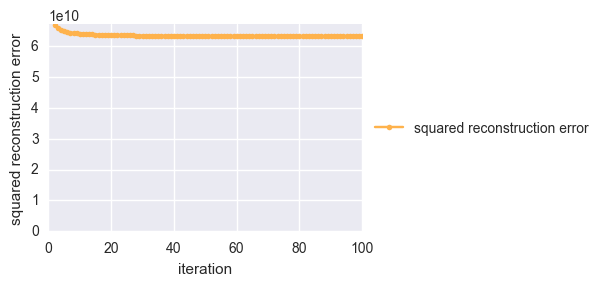

In [18]:
km_250_reconstruction = km_250.plot_squared_reconstruction_error()
km_250_reconstruction.savefig('../figures/k_means/k250_reconstruction_error.pdf',
                             bbox_inches='tight')

(b) Let us say that the number of assignments for a mean is the number of points assigned to that
mean. Plot the number of assignments for each center in descending order.

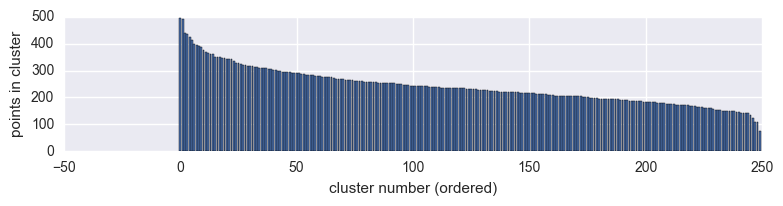

In [19]:
km_250_assignment_bars = km_250.plot_num_assignments_for_each_center()
km_250_assignment_bars.savefig('../figures/k_means/k250_assignment_bars.pdf',
                              bbox_inches='tight')

(c) Visualize 16 of these centers, chosen randomly. Display them in the order in an order in that
corresponds to the frequency in which they were assigned.

In [20]:
km_250.visualize_n_centers(16, top=True)

saving to k_250_top_16_centers_0.pdf
saving to k_250_top_16_centers_1.pdf
saving to k_250_top_16_centers_2.pdf
saving to k_250_top_16_centers_3.pdf
saving to k_250_top_16_centers_4.pdf
saving to k_250_top_16_centers_5.pdf
saving to k_250_top_16_centers_6.pdf
saving to k_250_top_16_centers_7.pdf
saving to k_250_top_16_centers_8.pdf
saving to k_250_top_16_centers_9.pdf
saving to k_250_top_16_centers_10.pdf
saving to k_250_top_16_centers_11.pdf
saving to k_250_top_16_centers_12.pdf
saving to k_250_top_16_centers_13.pdf
saving to k_250_top_16_centers_14.pdf
saving to k_250_top_16_centers_15.pdf
photo paths: 
k_250_top_16_centers_0.pdf k_250_top_16_centers_1.pdf k_250_top_16_centers_2.pdf k_250_top_16_centers_3.pdf k_250_top_16_centers_4.pdf k_250_top_16_centers_5.pdf k_250_top_16_centers_6.pdf k_250_top_16_centers_7.pdf k_250_top_16_centers_8.pdf k_250_top_16_centers_9.pdf k_250_top_16_centers_10.pdf k_250_top_16_centers_11.pdf k_250_top_16_centers_12.pdf k_250_top_16_centers_13.pdf k_250_

In [21]:
km_250.visualize_n_centers(16, top=False)

saving to k_250_random_16_centers_0.pdf
saving to k_250_random_16_centers_1.pdf
saving to k_250_random_16_centers_2.pdf
saving to k_250_random_16_centers_3.pdf
saving to k_250_random_16_centers_4.pdf
saving to k_250_random_16_centers_5.pdf
saving to k_250_random_16_centers_6.pdf
saving to k_250_random_16_centers_7.pdf
saving to k_250_random_16_centers_8.pdf
saving to k_250_random_16_centers_9.pdf
saving to k_250_random_16_centers_10.pdf
saving to k_250_random_16_centers_11.pdf
saving to k_250_random_16_centers_12.pdf
saving to k_250_random_16_centers_13.pdf
saving to k_250_random_16_centers_14.pdf
saving to k_250_random_16_centers_15.pdf
photo paths: 
k_250_random_16_centers_0.pdf k_250_random_16_centers_1.pdf k_250_random_16_centers_2.pdf k_250_random_16_centers_3.pdf k_250_random_16_centers_4.pdf k_250_random_16_centers_5.pdf k_250_random_16_centers_6.pdf k_250_random_16_centers_7.pdf k_250_random_16_centers_8.pdf k_250_random_16_centers_9.pdf k_250_random_16_centers_10.pdf k_250_ran

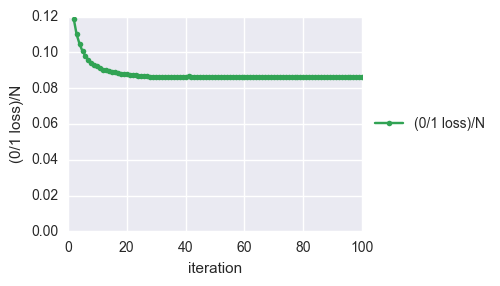

In [22]:
# just for fun
km_250_loss_01 = km_250.plot_0_1_loss()

## 5.2 Classification with K-means

1. (4 points) For K = 16, what are your training and test 0/1 losses?

In [23]:
km_16.assess_test_data()

test results:
                                             0
iteration                         1.500000e+02
0/1 loss                          3.176000e+03
(0/1 loss)/N                      3.176000e-01
(squared reconstruction error)/N  1.786819e+06
squared reconstruction error      1.786819e+10


2. (4 points) For K = 250, what are your training and test 0/1 losses?

In [24]:
km_250.assess_test_data()

test results:
                                             0
iteration                         1.000000e+02
0/1 loss                          8.030000e+02
(0/1 loss)/N                      8.030000e-02
(squared reconstruction error)/N  1.086271e+06
squared reconstruction error      1.086271e+10


## Check out centers that appear to be a mix of digits.

for k = 16, center number 5 appears to be a blend of 5 and 8.  What are it's true labels? 